# Machine Learning Deliverable 1

In [1]:
# import dependencies
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score as evs # evaluation metric
from sklearn.metrics import r2_score as r2 # evaluation metric
from sklearn import metrics
#from sklearn.metrics import score

In [2]:
# load csv of subset of data
df = pd.read_csv(Path('./austinHousingData_copy.csv'))
df.head()

,latestPrice,propertyTaxRate,garageSpaces,numPriceChanges,lotSizeSqFt,livingAreaSqFt,avgSchoolRating,numOfBathrooms,numOfBedrooms
0,305000,1.98,2,5,6011.0,2601,2.666667,3.0,4
1,295000,1.98,2,1,6185.0,1768,2.666667,2.0,4
2,256125,1.98,0,1,7840.0,1478,3.000000,2.0,3
3,240000,1.98,2,4,6098.0,1678,2.666667,2.0,3
4,239900,1.98,0,3,6708.0,2132,4.000000,3.0,3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15171 entries, 0 to 15170
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   latestPrice      15171 non-null  int64  
 1   propertyTaxRate  15171 non-null  float64
 2   garageSpaces     15171 non-null  int64  
 3   numPriceChanges  15171 non-null  int64  
 4   lotSizeSqFt      15171 non-null  float64
 5   livingAreaSqFt   15171 non-null  int64  
 6   avgSchoolRating  15171 non-null  float64
 7   numOfBathrooms   15171 non-null  float64
 8   numOfBedrooms    15171 non-null  int64  
dtypes: float64(4), int64(5)
memory usage: 1.0 MB


In [4]:
# placeholder for getdummies or labelencoder method for categorical variables in future deliverable


In [5]:
df.describe()

,latestPrice,propertyTaxRate,garageSpaces,numPriceChanges,lotSizeSqFt,livingAreaSqFt,avgSchoolRating,numOfBathrooms,numOfBedrooms
count,1.517100e+04,15171.000000,15171.000000,15171.000000,1.517100e+04,15171.000000,15171.000000,15171.000000,15171.000000
mean,5.127677e+05,1.994085,1.229187,3.032892,1.190840e+05,2208.323314,5.779912,2.683010,3.440380
std,4.531853e+05,0.053102,1.352117,2.487392,1.225272e+07,1378.576119,1.860276,1.054445,0.849942
min,5.500000e+03,1.980000,0.000000,1.000000,1.000000e+02,300.000000,2.333333,0.000000,0.000000
25%,3.090000e+05,1.980000,0.000000,1.000000,6.534000e+03,1483.000000,4.000000,2.000000,3.000000
50%,4.050000e+05,1.980000,1.000000,2.000000,8.276000e+03,1975.000000,5.778694,3.000000,3.000000
75%,5.750000e+05,1.980000,2.000000,4.000000,1.089000e+04,2687.000000,7.000000,3.000000,4.000000
max,1.350000e+07,2.210000,22.000000,23.000000,1.508483e+09,109292.000000,9.500000,27.000000,20.000000


<AxesSubplot:>

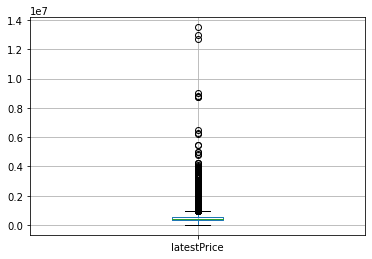

In [6]:
# Either do a histogram of housing prices and make BINS and/or do a box plot of housing prices to find outliers 
df.boxplot(column='latestPrice')

In [7]:
# Cut the df into bins for latest price (bins of home price).
spending_bins = [0, 50000, 100000, 300000, 500000,750000,1000000,2000000,3000000,4000000,5000000,7500000,10000000,15000000]
df.groupby(pd.cut(df.latestPrice, spending_bins)).count()

,latestPrice,propertyTaxRate,garageSpaces,numPriceChanges,lotSizeSqFt,livingAreaSqFt,avgSchoolRating,numOfBathrooms,numOfBedrooms
latestPrice,,,,,,,,,
"(0, 50000]",14,14,14,14,14,14,14,14,14
"(50000, 100000]",48,48,48,48,48,48,48,48,48
"(100000, 300000]",3638,3638,3638,3638,3638,3638,3638,3638,3638
"(300000, 500000]",6624,6624,6624,6624,6624,6624,6624,6624,6624
"(500000, 750000]",2953,2953,2953,2953,2953,2953,2953,2953,2953
"(750000, 1000000]",952,952,952,952,952,952,952,952,952
"(1000000, 2000000]",753,753,753,753,753,753,753,753,753
"(2000000, 3000000]",121,121,121,121,121,121,121,121,121
"(3000000, 4000000]",48,48,48,48,48,48,48,48,48


array([[<AxesSubplot:title={'center':'latestPrice'}>]], dtype=object)

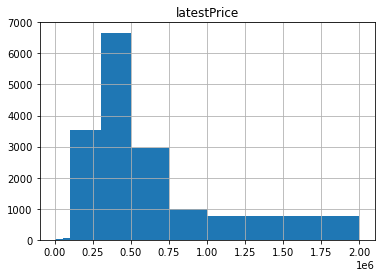

In [8]:
spending_bins2 = [0, 50000, 100000, 300000, 500000,750000,1000000,2000000]
df.hist(column='latestPrice', bins=spending_bins2)

In [9]:
#df.numPriceChanges.value_counts()

In [10]:
# enter scatter plots before scaled here
#plt.bar(df.numPriceChanges, df.latestPrice)
#plt.xlabel('# Price Changes')
#plt.ylabel('Latest Home Price')
#plt.show()

In [11]:
# scale the data
#data_scaler = StandardScaler()
#df_scaled = data_scaler.fit_transform(df)
#df_scaled[:5]

In [12]:
#df_scaled[:,0]

In [13]:
# bar plot using scaled data
#plt.bar(df_scaled[:,3], df_scaled[:,0])
#plt.xlabel('# Price Changes')
#plt.ylabel('Latest Home Price')
#plt.show()

In [14]:
# Eventually add skatter plots of y vs. continuous variable (x) for multiple independent variables (scaled or unscaled)
#plt.scatter(X, y)
#plt.plot(X, y_pred, color='red')
#plt.show()

In [15]:
#housing_df = df.loc[(df.latestPrice >=100000) & (df.latestPrice < 3000000)]
#len(housing_df)

In [16]:
housing_df = df[df['latestPrice'].between(100000, 3000000,inclusive='right')]
len(housing_df)

15041

## Test using Random Forest Regressor on scaled housing data

In [17]:
# Define the features (X) and target (y) set
y = housing_df.latestPrice
X = housing_df.copy()
X = X.drop(['latestPrice','propertyTaxRate','garageSpaces','numPriceChanges','numOfBedrooms'], axis=1)
X.head(3)

,lotSizeSqFt,livingAreaSqFt,avgSchoolRating,numOfBathrooms
0,6011.0,2601,2.666667,3.0
1,6185.0,1768,2.666667,2.0
2,7840.0,1478,3.000000,2.0


In [18]:
#x train and x test (unscaled data)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [19]:
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [20]:
# Create a random forest regressor. (remember to play around with parameters)
rfr_model = RandomForestRegressor(n_estimators=300, max_features = 'sqrt', max_depth = 7, random_state=78) 

In [21]:
# Fit the model
rf_model = rfr_model.fit(X_train_scaled, y_train)

In [22]:
# Making predictions using the testing data.
predictions = rf_model.predict(X_test_scaled)
predictions

array([402616.41657214, 405911.24262353, 290004.50447325, ...,
       457386.79252062, 322147.60383191, 311519.97816512])

In [23]:
# this evaluates the random forest regressor model
metrics.mean_absolute_error(y_test, predictions)

134940.22819723617

In [24]:
# Calculate feature importance in the Random Forest model. HOW DO WE KNOW IF ACCURATE?
importances = rf_model.feature_importances_
importances

array([0.14034413, 0.40102862, 0.13858809, 0.32003915])

In [25]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 134940.22819723617
Mean Squared Error: 47428069601.13741
Root Mean Squared Error: 217779.86500394708


## Test using Linear Regression ML Model

In [26]:
model = LinearRegression()
model.fit(X, y)
model = model.fit(X_train, y_train)

In [27]:
# Making predictions using the testing data.
predictions = model.predict(X_test)

In [28]:
y_pred = model.predict(X)
print(y_pred.shape)

(15041,)


In [29]:
# explained variance score
print('Explained Variance Score of model is {}'.format(evs(y_test, predictions)))

# R-squared
print('R-Squared value of model is {}'.format(r2(y_test, predictions)))

Explained Variance Score of model is 0.3360119027854065
R-Squared value of model is 0.3359753803207495
